In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 200)

In [2]:
dados = pd.read_csv('house_data.csv')

In [3]:
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Sobre as variáveis

- city - cidade onde o apartamento está situado
- area - tamanho do apartamento
- rooms - número de quartos
- bathroom - número de banheiros
- parking spaces - vagas em garagem
- floor - andar do apartamento
- animal - se aceita animais
- furniture - se já é mobiliado
- hoa 
- rent amount
- property tax
- fire insurance
- total

### O modelo tem como objetivo estimar o aluguel de uma casa

In [4]:
## Retirando o campo de seguro incendio e total

dados.drop(columns = ['fire insurance (R$)', 'total (R$)'], inplace = True)

In [5]:
dados.rename({'hoa (R$)':'hoa','rent amount (R$)':'rent_amount','property tax (R$)':'property_tax'}, axis = 1, inplace = True)

## Tamanho do dataset: 

10692 linhas e 11 colunas

In [6]:
dados.shape

(10692, 11)

In [7]:
## Verificando Nulos

dados.isnull().sum().sort_values()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent_amount       0
property_tax      0
dtype: int64

In [8]:
## Frequência de classes

for col in dados.columns:
    print("O campo ", col, " tem ", dados[f'{col}'].value_counts().shape[0]," classes")

O campo  city  tem  5  classes
O campo  area  tem  517  classes
O campo  rooms  tem  11  classes
O campo  bathroom  tem  10  classes
O campo  parking spaces  tem  11  classes
O campo  floor  tem  35  classes
O campo  animal  tem  2  classes
O campo  furniture  tem  2  classes
O campo  hoa  tem  1679  classes
O campo  rent_amount  tem  1195  classes
O campo  property_tax  tem  1243  classes


Como esperado, os campos animal e furniture possuem apenas dois valores únicos (sim ou não)

In [9]:
## Tipos de cada campo

dados.dtypes

city              object
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa                int64
rent_amount        int64
property_tax       int64
dtype: object

Temos 7 campos inteiros e 4 objeto

## Exploração dos Dados

In [10]:
categoricas = dados.columns[dados.dtypes == object]
quantitativas = dados.columns[dados.dtypes != object]

## Avaliando variáveis categóricas

In [11]:
categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [12]:
## Cidade

frequencia = dados['city'].value_counts()
percentual = dados['city'].value_counts(normalize = True)*100
df = pd.DataFrame({'freq_cidade':frequencia, 'perc_cidade':percentual})
df.rename_axis('Cidade', axis = 'columns', inplace = True)

#sns.barplot(data = df, x = 'Cidade', y = 'freq_cidade')
df

Cidade,freq_cidade,perc_cidade
São Paulo,5887,55.059858
Rio de Janeiro,1501,14.038533
Belo Horizonte,1258,11.765806
Porto Alegre,1193,11.157875
Campinas,853,7.977927


In [13]:
## Floor

frequencia = dados['floor'].value_counts()
percentual = dados['floor'].value_counts(normalize = True)*100
df2 = pd.DataFrame({'freq_andar':frequencia, 'perc_andar':percentual})
df2.rename_axis('Andar', axis = 'columns', inplace = True)

#sns.barplot(data = df, x = 'Cidade', y = 'freq_cidade')
df2

Andar,freq_andar,perc_andar
-,2461,23.017209
1,1081,10.110363
2,985,9.212495
3,931,8.707445
4,748,6.995885
5,600,5.611672
6,539,5.041152
7,497,4.648335
8,490,4.582866
9,369,3.451178


Temos um outlier no dataset: um 301° andar
Temos, também, um andar com '-', o que pode significar uma casa ou apartamento no térreo, ou mesmo falta de informação

In [14]:
## Animal

frequencia = dados['animal'].value_counts()
percentual = dados['animal'].value_counts(normalize = True)*100
df3 = pd.DataFrame({'freq_animal':frequencia, 'perc_animal':percentual})
df3.rename_axis('Animal', axis = 'columns', inplace = True)

#sns.barplot(data = df, x = 'Cidade', y = 'freq_cidade')
df3

Animal,freq_animal,perc_animal
acept,8316,77.777778
not acept,2376,22.222222


Temos, então, que 22% dos apartamentos não aceitam animais e 78% aceitam

In [15]:
## Furniture

frequencia = dados['furniture'].value_counts()
percentual = dados['furniture'].value_counts(normalize = True)*100
df4 = pd.DataFrame({'freq_mobiliado':frequencia, 'perc_mobiliado':percentual})
df4.rename_axis('Mobiliado', axis = 'columns', inplace = True)

#sns.barplot(data = df, x = 'Cidade', y = 'freq_cidade')
df4

Mobiliado,freq_mobiliado,perc_mobiliado
not furnished,8086,75.626637
furnished,2606,24.373363


Temos que 24% dos apartamentos são mobiliados e 76% não

## Nota sobre Outlier em Floor

No curso, o ministrante "corrige" o dado para 30° andar, mas, lendo sobre tratamento de outliers, o mais recomendado foi não considerar o registro. Logo, tentarei desconsiderando o registro.
Porém, os andares marcados como '-' marcarei como zero, como indicado pelo ministrante.

In [16]:
dados_novos = dados.loc[dados['floor'] != '301']

In [17]:
dados_novos['floor'] = dados_novos['floor'].apply(lambda x: 0 if x == '-' else x)
dados_novos['floor'] = pd.to_numeric(dados_novos['floor'])

<ipython-input-17-46fd3f91ed69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['floor'] = dados_novos['floor'].apply(lambda x: 0 if x == '-' else x)
<ipython-input-17-46fd3f91ed69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['floor'] = pd.to_numeric(dados_novos['floor'])


In [18]:
## Floor

frequencia = dados_novos['floor'].value_counts()
percentual = dados_novos['floor'].value_counts(normalize = True)*100
df5 = pd.DataFrame({'freq_andar':frequencia, 'perc_andar':percentual})
df5.rename_axis('Andar', axis = 'columns', inplace = True)

#sns.barplot(data = df, x = 'Cidade', y = 'freq_cidade')
df5

Andar,freq_andar,perc_andar
0,2461,23.019362
1,1081,10.111309
2,985,9.213357
3,931,8.708259
4,748,6.996539
5,600,5.612197
6,539,5.041624
7,497,4.648770
8,490,4.583294
9,369,3.451501


## Análise das variáveis Quantitativas

In [19]:
quantitativas

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa', 'rent_amount',
       'property_tax'],
      dtype='object')

As areas dos apartamentos variam de 11 a 46335 metros


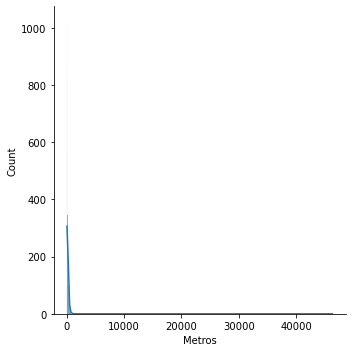

In [20]:
print(f'As areas dos apartamentos variam de {dados_novos.area.min()} a {dados_novos.area.max()} metros')
ax = sns.displot(dados_novos['area'], kde = True)
ax.set_xlabels('Metros')

In [21]:
dados_novos.loc[dados_novos['area'] > 1000].shape

(9, 11)

Temos 9 linhas com área maior que 1000 $m^2$

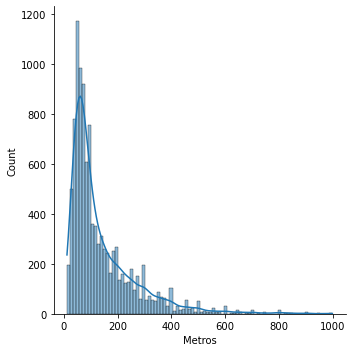

In [22]:
ax = sns.displot(dados_novos.query('area < 1000')['area'], kde = True)
ax.set_xlabels('Metros')

In [23]:
dados_novos.query('area < 1000')['area'].describe()

count    10676.000000
mean       140.161577
std        128.261476
min         11.000000
25%         56.000000
50%         90.000000
75%        181.000000
max        999.000000
Name: area, dtype: float64

A distribuição dos dados é assimétrica à direita, com moda < mediana < media

O número de quartos dos apartamentos variam de 1 a 13


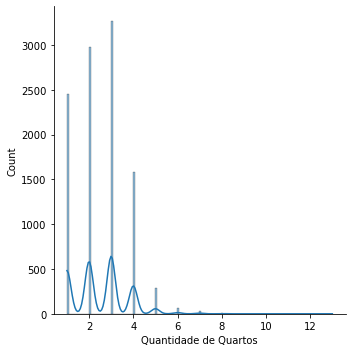

In [24]:
print(f'O número de quartos dos apartamentos variam de {dados_novos.rooms.min()} a {dados_novos.rooms.max()}')
ax = sns.displot(dados_novos['rooms'], kde = True)
ax.set_xlabels('Quantidade de Quartos')

<AxesSubplot:>

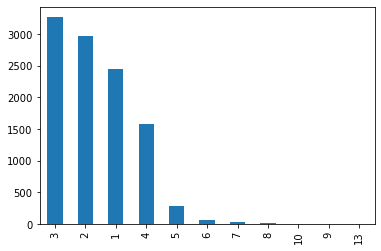

In [25]:
dados_novos['rooms'].value_counts().plot(kind = 'bar')

O número de banheiros dos apartamentos variam de 1 a 10


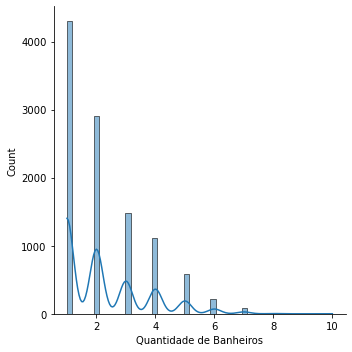

In [26]:
print(f'O número de banheiros dos apartamentos variam de {dados_novos.bathroom.min()} a {dados_novos.bathroom.max()}')
ax = sns.displot(dados_novos['bathroom'], kde = True)
ax.set_xlabels('Quantidade de Banheiros')

O número de banheiros dos apartamentos variam de  0  a  12


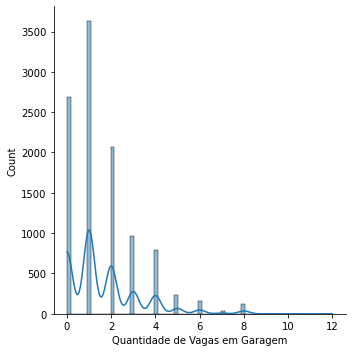

In [27]:
print("O número de banheiros dos apartamentos variam de ",dados_novos['parking spaces'].min()," a ",dados_novos['parking spaces'].max())
ax = sns.displot(dados_novos['parking spaces'], kde = True)
ax.set_xlabels('Quantidade de Vagas em Garagem')

Os valores de condomínio dos apartamentos variam de 0 a 1117000


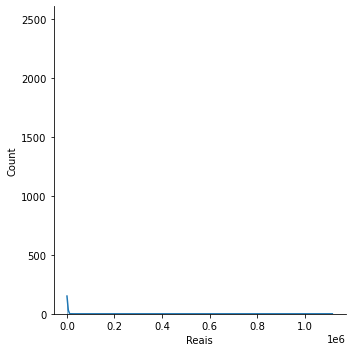

In [28]:
print(f'Os valores de condomínio dos apartamentos variam de {dados_novos.hoa.min()} a {dados_novos.hoa.max()}')
ax = sns.displot(dados_novos['hoa'], kde = True)
ax.set_xlabels('Reais')

Temos dois outliers nos dados acima de R$ 1 milhão

In [29]:
dados_novos.query('hoa > 1000000')['hoa'].shape

(2,)

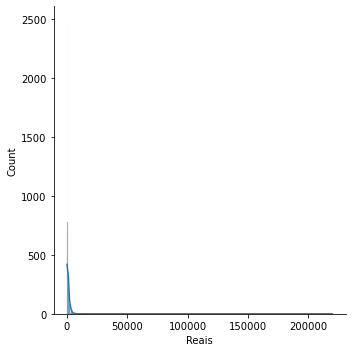

In [30]:
ax = sns.displot(dados_novos.query('hoa < 1000000')['hoa'], kde = True)
ax.set_xlabels('Reais')

Verificando os valores discrepantes de condomínio

In [51]:
outliers_cond = dados_novos['hoa'].sort_values(ascending = False)
outliers_cond.head(10)

255     1117000
6979    1117000
6230     220000
2859     200000
2928      81150
1444      32000
1213      15000
415       14130
5293      14000
8858      10000
Name: hoa, dtype: int64

Verificando os 4 maiores registros de condomínio

In [50]:
indices = [255, 2858, 6229, 6978]
for i in indices:
    print(f'Analise Registro {i}')
    print(dados_novos.iloc[i,:])
    print('--------------')

Analise Registro 255
city              Belo Horizonte
area                         155
rooms                          1
bathroom                       4
parking spaces                 0
floor                          4
animal                 not acept
furniture          not furnished
hoa                      1117000
rent_amount                 2790
property_tax                  64
Name: 255, dtype: object
--------------
Analise Registro 2858
city              São Paulo
area                    285
rooms                     4
bathroom                  5
parking spaces            4
floor                     6
animal                acept
furniture         furnished
hoa                  200000
rent_amount           20000
property_tax           1834
Name: 2859, dtype: object
--------------
Analise Registro 6229
city                  São Paulo
area                        340
rooms                         5
bathroom                      4
parking spaces                2
floor                  

Como os valores são muito superiores aos de aluguel e não são tão condizentes com as características dos apartamentos, provavelmente é erro de digitação

Da mesma forma, os 5° e 6° maiores registros também são erros de digitação, conforme análise das características abaixo:

In [52]:
dados_novos.iloc[2927,]

city              Rio de Janeiro
area                          35
rooms                          1
bathroom                       1
parking spaces                 0
floor                          1
animal                     acept
furniture              furnished
hoa                        81150
rent_amount                 4500
property_tax                9900
Name: 2928, dtype: object

In [134]:
dados_novos.iloc[1444,]

city              Porto Alegre
area                        42
rooms                        1
bathroom                     1
parking spaces               0
floor                       10
animal                       1
furniture                    0
hoa                      32000
rent_amount                700
property_tax                40
Name: 1444, dtype: object

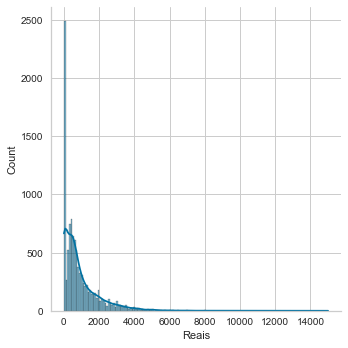

In [135]:
ax = sns.displot(dados_novos.query('hoa < 30000')['hoa'], kde = True)
ax.set_xlabels('Reais')

In [59]:
dados_novos.loc[dados_novos['hoa'] > 10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64
415,São Paulo,488,4,3,3,0,acept,not furnished,14130,6400,1214
1213,São Paulo,850,6,7,4,0,not acept,not furnished,15000,13000,2465
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64


Os valores de aluguel dos apartamentos variam de 450 a 45000


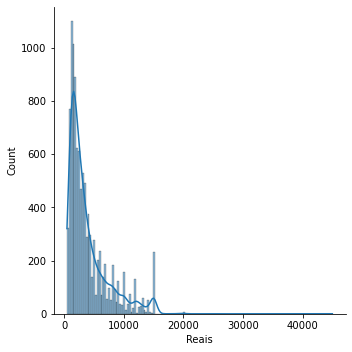

In [60]:
print(f'Os valores de aluguel dos apartamentos variam de {dados_novos.rent_amount.min()} a {dados_novos.rent_amount.max()}')
ax = sns.displot(dados_novos['rent_amount'], kde = True)
ax.set_xlabels('Reais')

Da mesma forma que a taxa de condomínio, aluguel também tem outliers que acabam distorcendo a análise

In [62]:
dados_novos['rent_amount'].sort_values(ascending = False).head(10)

2182    45000
7748    30000
6947    25000
2619    24000
5525    20000
1743    20000
1253    20000
2859    20000
157     20000
6185    19500
Name: rent_amount, dtype: int64

In [63]:
dados_novos.loc[dados_novos['rent_amount'] > 20000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0
6947,São Paulo,486,8,4,6,0,acept,not furnished,0,25000,2200
7748,São Paulo,350,3,3,3,0,acept,not furnished,0,30000,560


Os valores de IPTU dos apartamentos variam de 0 a 313700


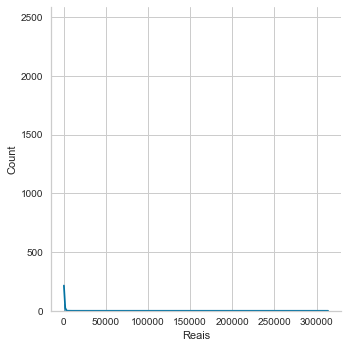

In [136]:
print(f'Os valores de IPTU dos apartamentos variam de {dados_novos.property_tax.min()} a {dados_novos.property_tax.max()}')
ax = sns.displot(dados_novos['property_tax'], kde = True)
ax.set_xlabels('Reais')

Temos, novamente, outliers no IPTU: um de R$ 313 mil e mais 2 acima de RS 20 mil

In [71]:
dados_novos.loc[dados_novos['property_tax'] > 20000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700


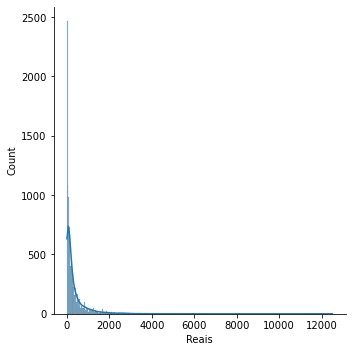

In [72]:
ax = sns.displot(dados_novos.query('property_tax < 20000')['property_tax'], kde = True)
ax.set_xlabels('Reais')

Modificando alguns valores das variáveis

In [75]:
dados_novos['animal'] = dados_novos['animal'].map({'acept': 1, 'not acept': 0})
dados_novos['furniture'] = dados_novos['furniture'].map({'furnished': 1, 'not furnished': 0})

<ipython-input-75-e9d6e19afe1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['animal'] = dados_novos['animal'].map({'acept': 1, 'not acept': 0})
<ipython-input-75-e9d6e19afe1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['furniture'] = dados_novos['furniture'].map({'furnished': 1, 'not furnished': 0})


In [76]:
dados_novos['animal'].value_counts()

1    8315
0    2376
Name: animal, dtype: int64

In [77]:
dados_novos['furniture'].value_counts()

0    8085
1    2606
Name: furniture, dtype: int64

## Modelo

In [78]:
filtro_sp = dados_novos.loc[dados_novos['city'] == 'São Paulo']
filtro_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [79]:
filtro_sp.drop(columns = 'city')

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735
...,...,...,...,...,...,...,...,...,...,...
10683,280,4,4,2,5,1,0,4200,4000,1042
10685,83,3,2,2,11,1,0,888,7521,221
10686,150,3,3,2,8,0,1,0,13500,0
10688,285,4,4,4,17,1,0,3100,15000,973


In [115]:
#Separando parte para validação (10% da população)

caracteristicas, x_validacao, previsor, y_validacao = \
    train_test_split(filtro_sp.drop(columns = ['rent_amount','city']), filtro_sp['rent_amount'], test_size = 0.1, random_state = 100)

In [116]:
#caracteristicas = filtro_sp.drop(columns = ['rent_amount'])
#previsor = filtro_sp['rent_amount']

print(x_validacao.shape, y_validacao.shape)
caracteristicas.shape, previsor.shape

(589, 9) (589,)


((5298, 9), (5298,))

In [117]:
caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,property_tax
10307,197,3,4,3,16,1,1,2400,1167
1870,156,2,3,2,8,1,1,2040,292
2459,47,1,1,1,15,1,0,530,0
982,80,2,3,0,6,1,0,1312,427
8093,51,2,1,1,9,0,0,450,109


In [99]:
previsor.head()

10307     6502
1870     13590
2459      1800
982       3300
8093      2200
Name: rent_amount, dtype: int64

## Verificando correlação

In [84]:
filtro_sp.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa,0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent_amount,0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property_tax,0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


## Correlação Com Seaborn

<AxesSubplot:>

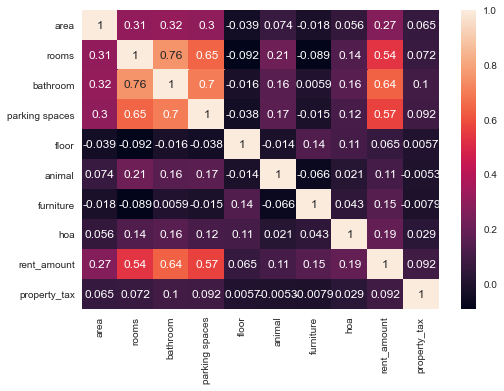

In [91]:
ax = sns.heatmap(filtro_sp.corr(), annot = True)
ax

## Do mapa de calor podemos inferir que:

### Variáveis altamente relacionadas (acima de 0,7 ou abaixo de -0,7):

- Número de quartos e número de banheiros (quanto maior o número de quartos, maior o de banheiros)
- Número de quartos e IPTU
- Número de banheiros e vagas

### Variáveis moderamente relacionadas (entre 0,5 e 0,7 ou -0,5 e -0,7):
- Área e Valor de condomínio estão moderamente relacionadas
- Número de Quartos e vagas
- Número de banheiros e valor do aluguel
- Vagas e Aluguel

### Variáveis com baixa correlação (|correlação| abaixo de 0,5):
- Todas as demais

## Utilizando SKLearn

Para o modelo, separaremos em dataset em 3:
- Amostra para treino (70%)
- Amostra para teste (20%)
- Amostra para validação do modelo e análise de acurácia (10%)

In [93]:
from sklearn.model_selection import train_test_split

In [118]:
x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristicas, previsor, test_size = 0.1, random_state = 100)

## Features mais significativas

In [102]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [119]:
# Função para seleção das features mais significativas

def selecao_features(x_treino, y_treino):
    selecao = SelectKBest(score_func = mutual_info_regression, k ='all')
    
    selecao.fit(x_treino, y_treino)
    
    return selecao

In [123]:
scores = selecao_features(x_treino, y_treino)

for posicao, score in enumerate(scores.scores_):
    print(f'{x_treino.columns[posicao]}, {score}')

area, 0.31384742250960107
rooms, 0.24147600327914542
bathroom, 0.32163422486003146
parking spaces, 0.24621009178595754
floor, 0.030128474897078483
animal, 0.026660930500541635
furniture, 0.033098380358973944
hoa, 0.1434215841508153
property_tax, 0.1808516380717764


Como todas as variáveis são relativamente significativas, irão todas para a construção do modelo

## Construção do Modelo

In [124]:
# Usar Random Forest - Arvores - Determina qual das arvores teve melhor perfomance

from sklearn.ensemble import RandomForestRegressor

modelo_floresta = RandomForestRegressor(max_depth = 5)

modelo_floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [125]:
previsoes = modelo_floresta.predict(x_teste)

previsoes[0:5]

array([2483.05158551, 7958.41456693, 6756.76562141, 3922.08460161,
       6355.10261358])

In [127]:
y_teste.head()

7939    3300
6977    4792
5041    4800
3391    6000
5343    2890
Name: rent_amount, dtype: int64

In [128]:
x_teste.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,property_tax
7939,87,2,2,2,12,1,0,650,209
6977,300,5,5,4,8,1,0,3200,1500
5041,323,5,5,3,0,1,0,0,582
3391,103,3,3,0,6,1,0,1530,320
5343,380,4,1,0,0,1,0,0,150


## Métricas para avaliar perfomance da árvore

In [129]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [133]:
print(f'Erro médio quadrático: {sqrt(mean_squared_error(y_teste, previsoes))}')
print(f'R2 Score: {r2_score(y_teste, previsoes)}')

Erro médio quadrático: 2256.930649339656
R2 Score: 0.6333368862717987


## Tirando mais outliers

Iremos considerar:
- Área abaixo de 1000 $m^2$
- Valor de condomínio abaixo de R$ 30 mil
- IPTU abaixo de 20 mil

In [139]:
filtro_sp = filtro_sp.loc[(filtro_sp['area'] < 1000) & (filtro_sp['hoa'] < 30000) & (filtro_sp['property_tax'] < 20000)]

In [140]:
#Separando parte para validação (10% da população)

caracteristicas, x_validacao, previsor, y_validacao = \
    train_test_split(filtro_sp.drop(columns = ['rent_amount','city']), filtro_sp['rent_amount'], test_size = 0.1, random_state = 100)

In [141]:
#caracteristicas = filtro_sp.drop(columns = ['rent_amount'])
#previsor = filtro_sp['rent_amount']

print(x_validacao.shape, y_validacao.shape)
caracteristicas.shape, previsor.shape

(588, 9) (588,)


((5288, 9), (5288,))

<AxesSubplot:>

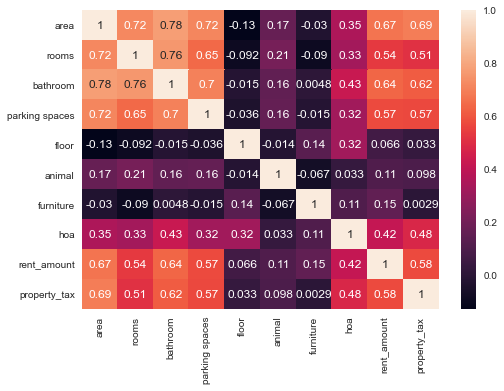

In [142]:
ax = sns.heatmap(filtro_sp.corr(), annot = True)
ax

## O mapa de calor mudou retirando os outliers

## Deste novo podemos inferir que:

### Variáveis altamente relacionadas (acima de 0,7 ou abaixo de -0,7):

- Área do apartamento e o número de quartos
- Área do apartamento e o número de banheiros
- Área do apartamento e o número de vagas
- Número de quartos e número de banheiros (quanto maior o número de quartos, maior o de banheiros)
- Número de banheiros e vagas
- Todas com correlações positivas

### Variáveis moderamente relacionadas (entre 0,5 e 0,7 ou -0,5 e -0,7):
- Área e o aluguel do apartamento
- Área e IPTU do apartamento
- Número de Quartos e vagas
- Número de Quartos e aluguel do apartamento
- Número de Quartos e valor do IPTU do apartamento
- Número de banheiros e valor do aluguel
- Número de banheiros e vagas
- Número de banheiros e IPTU
- Vagas e Aluguel
- Vagas e IPTU
- Aluguel e IPTU

### Variáveis com baixa correlação (|correlação| abaixo de 0,5):
- Todas as demais

## Principais mudanças

- Valor de condomínio já não é mais altamente relacionada com nenhuma outra variável
- Aluguel e IPTU estão mais relacionadas com as variáveis comparada com o mapa anterior

In [143]:
x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristicas, previsor, test_size = 0.1, random_state = 100)

In [144]:
scores = selecao_features(x_treino, y_treino)

for posicao, score in enumerate(scores.scores_):
    print(f'{x_treino.columns[posicao]}, {score}')

area, 0.3151193587178458
rooms, 0.2546796664421884
bathroom, 0.3050694407998096
parking spaces, 0.2368259951215812
floor, 0.03195643683626859
animal, 0.012232003966282878
furniture, 0.051836258257003553
hoa, 0.14221965064188824
property_tax, 0.17182130211366298


In [145]:
# Usar Random Forest - Arvores - Determina qual das arvores teve melhor perfomance

modelo_floresta = RandomForestRegressor(max_depth = 5)

modelo_floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [146]:
previsoes = modelo_floresta.predict(x_teste)

previsoes[0:5]

array([4080.0239982 , 1990.39552096, 4717.00284104, 6109.50676036,
       1763.8397594 ])

In [147]:
y_teste.head(5)

5387    3100
3408    1900
6834    2200
484     5000
3191    1086
Name: rent_amount, dtype: int64

In [148]:
print(f'Erro médio quadrático: {sqrt(mean_squared_error(y_teste, previsoes))}')
print(f'R2 Score: {r2_score(y_teste, previsoes)}')

Erro médio quadrático: 2441.0419168465223
R2 Score: 0.6082260548996763


In [152]:
from yellowbrick.regressor import PredictionError

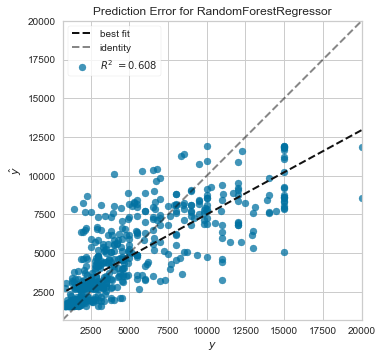

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [154]:
modelo = RandomForestRegressor(max_depth = 5)
erro_modelo = PredictionError(modelo)

erro_modelo.fit(x_treino, y_treino)
erro_modelo.score(x_teste, y_teste)

erro_modelo.show()

## Exportação do Modelo

In [155]:
import joblib

joblib.dump(modelo_floresta, 'modelo_floresta_casas.pkl')

['modelo_floresta_casas.pkl']

In [156]:
funcao_modelo_carregado = joblib.load('modelo_floresta_casas.pkl')

## Avaliando com o dataset de validação

In [157]:
prev_validacao = funcao_modelo_carregado.predict(x_validacao)

prev_validacao[0:5]

array([1627.76370933, 1731.45090901, 3106.80456709, 8332.75018414,
       8995.29011427])

In [158]:
y_validacao[0:5]

8144      750
2894     1100
8215     3700
9548     4000
8565    14000
Name: rent_amount, dtype: int64